In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy import stats
from scipy.optimize import minimize, curve_fit
from scipy.special import erf # error function
from iminuit import Minuit

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

lower limit: 2000, upper limit: 8000


(2.0, 8.0)

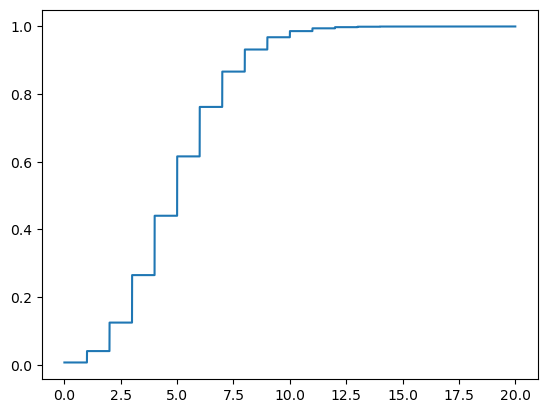

In [34]:
mu = 5

x = np.arange(0, 20, 1e-3)
cum_prob = stats.poisson.cdf(x, mu)

upper_limit = np.argmin(cum_prob<0.9)
lower_limit = np.argmin(cum_prob<0.1)

plt.plot(x, cum_prob)
print(f"lower limit: {lower_limit}, upper limit: {upper_limit}")
x[lower_limit], x[upper_limit]

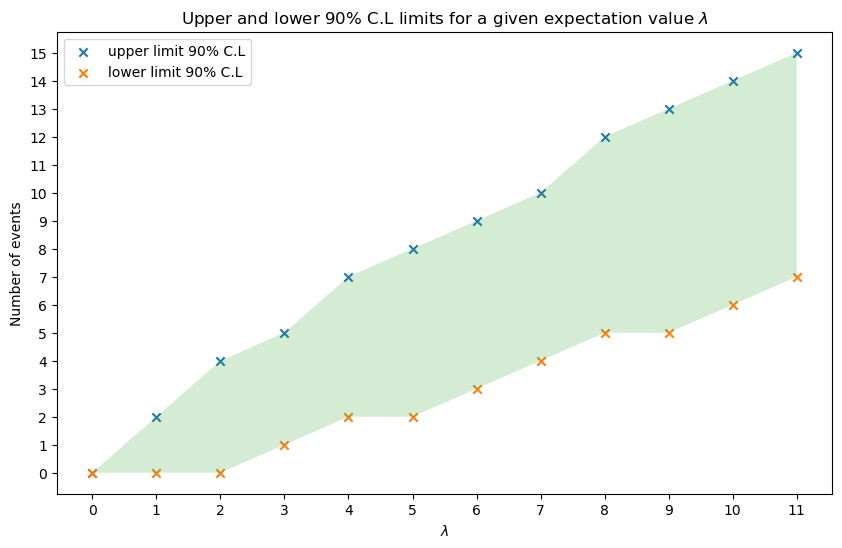

In [71]:
x = np.arange(0, 20, 1)
mu_array = np.arange(0, 12, 1)



uls = []
lls = []

for mu in mu_array:    
    cum_prob = stats.poisson.cdf(x, mu)
    upper_limit = x[np.argmin(cum_prob<0.9)]
    lower_limit = x[np.argmin(cum_prob<0.1)]
    uls.append(upper_limit)
    lls.append(lower_limit)

figure = plt.figure(figsize=(10, 6))

plt.scatter(mu_array, uls, label="upper limit 90% C.L", marker="x")
plt.scatter(mu_array, lls, label="lower limit 90% C.L", marker="x")

plt.xticks(mu_array)
plt.yticks(x)

plt.fill_between(mu_array, uls, lls, alpha=0.2)
plt.legend()

plt.title("Upper and lower 90% C.L limits for a given expectation value $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("Number of events")

plt.show()

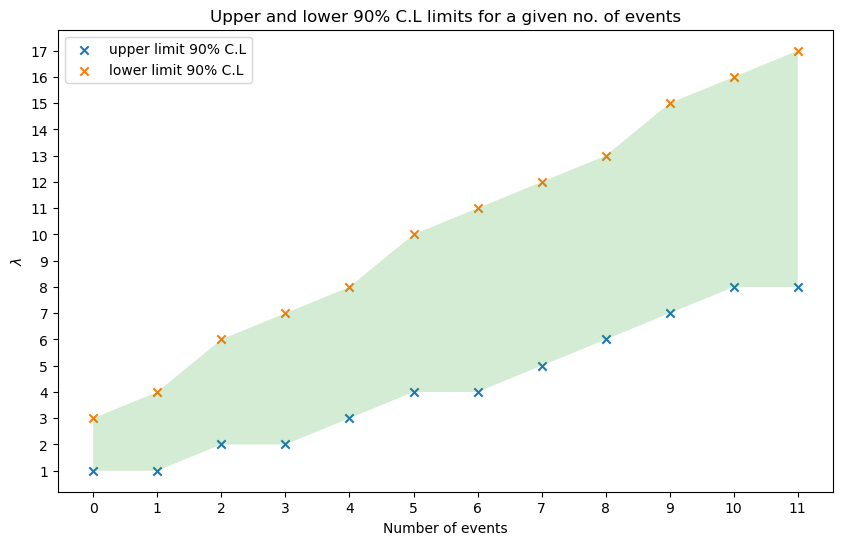

In [93]:
x = np.arange(0, 12, 1)
mu_array = np.arange(0, 18, 1)



uls = []
lls = []

for x_ in x:    
    cum_prob = stats.poisson.cdf(x_, mu_array)
    
    upper_limit = mu_array[np.argmax(cum_prob<0.9)]
    lower_limit = mu_array[np.argmax(cum_prob<0.1)]
    uls.append(upper_limit)
    lls.append(lower_limit)

figure = plt.figure(figsize=(10, 6))

plt.scatter(x, uls, label="upper limit 90% C.L", marker="x")
plt.scatter(x, lls, label="lower limit 90% C.L", marker="x")

plt.xticks(x)
plt.yticks(mu_array)


plt.fill_between(x, uls, lls, alpha=0.2)
plt.legend()
plt.title("Upper and lower 90% C.L limits for a given no. of events")
plt.xlabel("Number of events")
plt.ylabel("$\lambda$")
plt.show()

$$p(n;\lambda_{S};\lambda_{B})={\frac{\left(\lambda_{S}+\lambda_{B}\right)^{n}}{n!}}\exp\left(-\left[\lambda_{S}+\lambda_{B}\right]\right)$$

$$p(n\geq n_{o b s})=\sum_{n=n_{o b s}}^{\infty}p(n;\lambda_{S}=0;\lambda_{B})=1-\sum_{n=0}^{n_{o b s}-1}\frac{\lambda_{B}^{n}}{n!}\exp{(-\lambda_{B})}$$